In [1]:
# coding: utf-8
#==================== Part 1: Basic Function ====================
with open('D:\data\ex1data1.txt', 'r') as f:  
    data = f.readlines()  #txt中所有字符串读入data  

datamat = []
for line in data:  
    odom = line.strip().split(',')        #将单个数据分隔开存好  
    numbers_float = list(map(float, odom)) #转化为浮点数  
    datamat.append(numbers_float)

import numpy as np

datanp = np.array(datamat)

x = datanp[:,0].reshape((97,1))  #必须要reshape一下，不然为(97,)的形式，类似于数组，不是行列了！！！
y = datanp[:,1].reshape((97,1))

lenY = len(y)
X = np.hstack((np.ones((lenY,1)),x)) #按水平方向合并2*97

print(X.shape)

(97, 2)


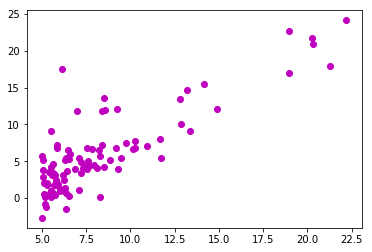

In [2]:
#======================= Part 2: Plotting =======================
import matplotlib.pyplot as plt  
f = plt.figure()  
p = plt.scatter(x, y, marker = 'o', color = 'm')  
plt.show()

In [3]:
#=================== Part 3: Cost and Gradient descent ===================
theta = np.zeros((2,1))    #initialize theta
#print theta

#Some gradient descent settings
iterations = 1500
alpha = 0.01

####functin#######
def computeCost(X, y, theta):
    J =  (1.0/(2*lenY)) * np.sum((np.dot(X,theta)-y)**2)  
    return J

J = computeCost(X, y, theta)#compute and display initial cost
print(J)

print(theta)

32.0727338775
[[ 0.]
 [ 0.]]


In [6]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    
    for iter in range(1,num_iters):
        theta = theta-(alpha*(1.0/lenY)*np.dot((np.dot(X,theta)-y).T,X)).reshape((2,1)) 
        #要reshape！不然就是1*2的行向量！！！
        #Save the cost J in every iteration    
        J_history.append(computeCost(X, y, theta))
    return theta, J_history


theta,J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print(theta)

[[-3.62981201]
 [ 1.16631419]]


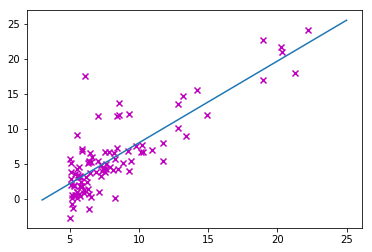

In [7]:
#%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
#y=theta0+theta1*x
fig = plt.figure() 
ax=fig.add_subplot(111)
ax = plt.scatter(x, y, marker = 'x', color = 'm')  

x = [3,25]
y = theta[0]+theta[1]*x
plt.plot(x,y)#调用plot函数绘制得到由点生成的线条

plt.show()

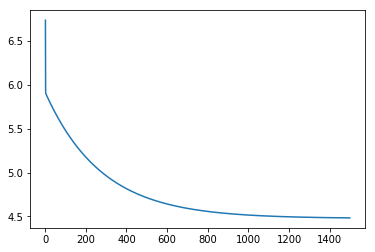

In [8]:
#theta
fig = plt.figure() 
y = J_history
x = np.arange(1,len(y)+1,1)
plt.plot(x,y)
plt.show()

# 数据来源：Andrew Ng课程  
# 参考代码：[课程matlab代码](https://github.com/fire717/Machine-Learning/tree/master/coursera_ML/ex1_liner)